In [2]:
import matplotlib.pyplot as plt
import random
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import torch
import torchvision.models as models
import torch.nn as nn
%matplotlib inline
from torchvision.models import ResNet50_Weights
import torchvision

In [3]:
BASE = 'classification_data/train/'
vehicle_types = os.listdir(BASE)
print(vehicle_types)

['Microbus', 'Bus', 'Sedan', 'Minivan', 'Truck', 'SUV']


In [4]:
dataset = {}
for vehicle_class in vehicle_types:
    dataset[vehicle_class] = [i for i in os.listdir(BASE + vehicle_class)]

In [5]:
print(dataset.keys())
print(len(dataset.keys()))

dict_keys(['Microbus', 'Bus', 'Sedan', 'Minivan', 'Truck', 'SUV'])
6


In [6]:
df = pd.DataFrame.from_dict(dataset, orient='index')
df = df.transpose()

In [7]:
df.head()

,Microbus,Bus,Sedan,Minivan,Truck,SUV
0,9f751a5d-822b-4469-9156-2b395ff20d50.jpg,6eed7c89-1509-4ea9-aa54-7b4f5e32997e.jpg,125f866d-01bb-4faf-bc03-2ac7d40b5665.jpg,de835b2e-8065-47c3-b509-866dcb6ae2b0.jpg,d080cda8-7775-448a-aa7b-5cc143a0d0a0.jpg,6dcf3bf9-5dcf-4a30-aa97-c19dec999a78.jpg
1,aa640043-bf7a-4d58-9ad4-078944321a8c.jpg,534c5b4b-b15f-4823-90e5-ddb59e2707cf.jpg,e9c23afd-70b9-4de3-9e02-a90065cfe8cc.jpg,1db6b3c8-b27e-4bac-9f07-c9d89ecdbfaf.jpg,40704b31-8e34-4cb3-a3fa-655866b8db16.jpg,3e01d4df-387d-4f58-8bcb-4bb075c13f35.jpg
2,0533b115-8fb1-4b99-a76f-fff6fb655d78.jpg,2832ea01-1d2e-4686-acb0-04ed2913d76b.jpg,0c8fccea-da84-4bcb-aebe-14177e26983a.jpg,afae21be-4fbb-484a-bda0-77a84f15174d.jpg,c4ca29b6-fe0e-435a-824b-de9050f169b1.jpg,20f00833-1d64-4a0b-8475-f4df0a2d0ac3.jpg
3,90c11051-cff7-43de-81d5-88d3395f723d.jpg,72d8d256-9751-4e58-b063-dbd8b48b7d74.jpg,6f4c6403-8f52-4619-a6f5-db6f7e2f55b1.jpg,f1a863e4-c09e-4cb5-99db-b1fd3668639f.jpg,aaeec88d-fe64-4a77-9417-51ea6fbb8775.jpg,e18cb8c3-caad-4893-972a-1a7a837144e3.jpg
4,8ce3c0f6-6ff5-43df-a6db-2573d17b9d23.jpg,898c2fcc-75ca-4c7c-badd-a56d442a5b86.jpg,08f0ea40-c993-4d9d-b8ee-87aa427e3baa.jpg,f5789b83-8286-432a-9899-28e5acad7549.jpg,09091e85-7047-4de8-9bea-e4b5cc1da4e3.jpg,87718bcf-dd51-4007-86b3-b3042130a9ba.jpg


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Microbus  2000 non-null   object
 1   Bus       1533 non-null   object
 2   Sedan     2000 non-null   object
 3   Minivan   785 non-null    object
 4   Truck     1968 non-null   object
 5   SUV       2000 non-null   object
dtypes: object(6)
memory usage: 93.9+ KB


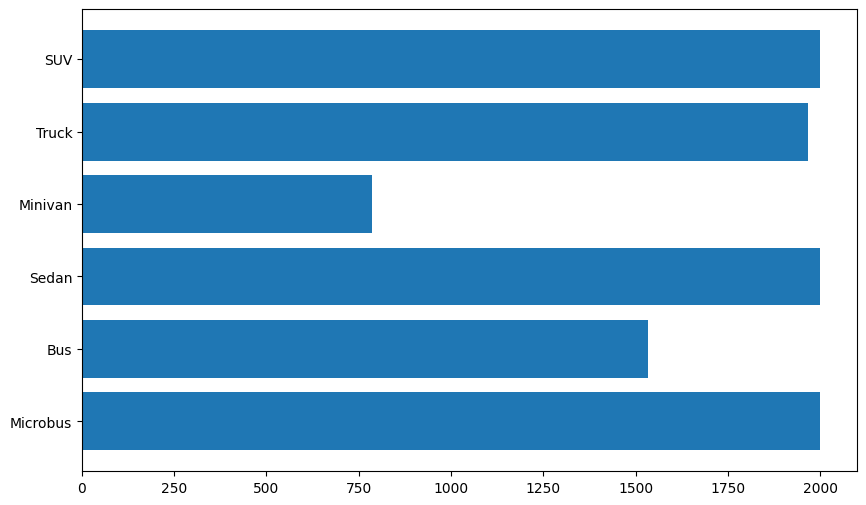

In [9]:
cols = []
col_imgs = []
for col in df.columns:
    cols.append(col)
    col_imgs.append(df[col].count())

plt.figure(figsize=(10,6))
plt.barh(cols, col_imgs)
plt.show()

Displaying 4 random image per vehicle class


<Figure size 640x480 with 0 Axes>

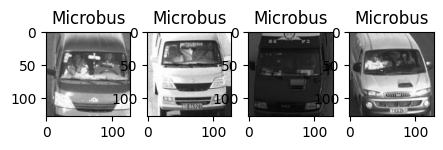

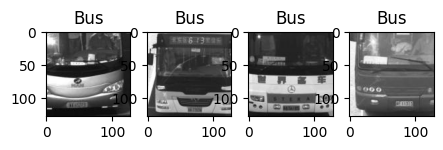

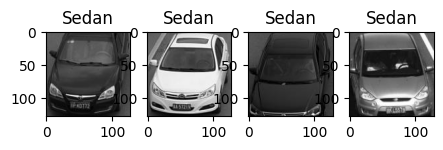

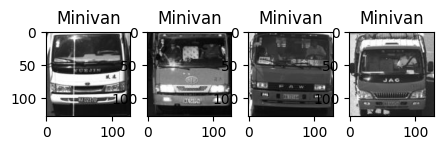

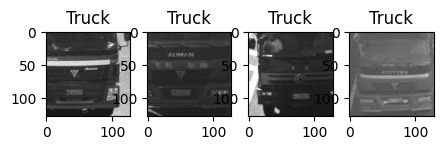

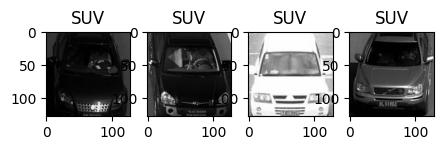

In [10]:
print("="*70)
print("Displaying 4 random image per vehicle class")
print("="*70)

# for every class in `cols`
for j in range(len(vehicle_types)):
    plt.figure(j)
    plt.figure(figsize=(5,5))
    
    # 4 images per every class
    for i in range(4):
        id = "14{}".format(i+1)
        plt.subplot(int(id))
        random_file = random.choice(os.listdir(BASE + cols[j] + "/"))
        img = cv2.imread(BASE + cols[j] + "/" + random_file)
        plt.title(cols[j])
        plt.imshow(img)
plt.show()

In [11]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet's mean and std
])

In [201]:
from torchvision.datasets import ImageFolder

test_data_path = "classification_data/test"

test_dataset = ImageFolder(root=test_data_path, transform=transform)


In [202]:
from torch.utils.data import DataLoader

test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True, num_workers=4)


In [203]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # Pause a bit so that plots are updated


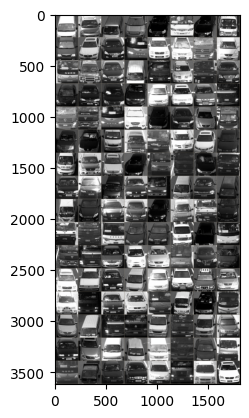

In [204]:
# Get a batch of training data
images, classes = next(iter(test_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(images)

imshow(out)


In [223]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=None)  # Initialize the model
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(nn.Dropout(0.5), nn.Linear(num_ftrs, len(vehicle_types)))

model.load_state_dict(torch.load('final_results/reg/model-final-reg.pth'))
model = model.to("cuda")

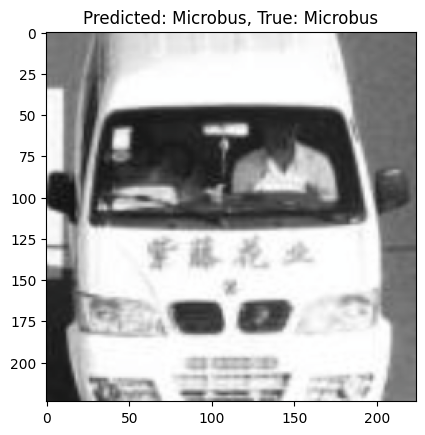

In [230]:
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)
test_image = next(iter(test_loader))
true_label = test_image[1].item()
test_image = test_image[0]
show_image = test_image[0].squeeze()

output = model(test_image[0].unsqueeze(0).to(device))
_, predicted = torch.max(output, 1)
predicted_label = test_dataset.classes[predicted.item()]

imshow(show_image.cpu(), title=f'Predicted: {predicted_label}, True: {test_dataset.classes[true_label]}')


In [225]:
from sklearn.metrics import classification_report

test_data_path = "classification_data/test"
test_dataset = ImageFolder(root=test_data_path, transform=transform)
test_loader = DataLoader(
    test_dataset, batch_size=128, shuffle=True, num_workers=4
)

model.eval()

# Lists to store predictions and true labels
true_labels = []
predictions = []

# Iterate over the test data and make predictions
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.numpy())
        predictions.extend(predicted.cpu().numpy())

# Generate the classification report
report = classification_report(true_labels, predictions, target_names=vehicle_types)
print(report)

              precision    recall  f1-score   support

    Microbus       0.98      0.95      0.96       781
         Bus       0.81      0.86      0.84      1360
       Sedan       0.73      0.70      0.71       435
     Minivan       0.78      0.65      0.71      1253
       Truck       0.87      0.91      0.89      3228
         SUV       0.88      0.91      0.89       955

    accuracy                           0.85      8012
   macro avg       0.84      0.83      0.84      8012
weighted avg       0.85      0.85      0.85      8012



In [226]:
model.eval() 
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 85.33%
